In [9]:
options(repr.plot.width=15, repr.plot.height=10)

In [10]:
library(plyr)
library(ggplot2)
library(corpcor)
library(evolqg)
library(tidyverse)
library(cowplot)
library(patchwork)
library(psych)
library(doMC)
registerDoMC(8)

In [11]:
data_folder = "/Genomics/ayroleslab2/lamaya/bigProject/eQTLcatalog/modularity/matrices"
dir(data_folder)

[1] "README"                                                                    
[2] "VOOMCounts_CPM1_body_ctrl_onlygenesinmainchr_939ind_covfree_Jul21.21.txt"  
[3] "VOOMCounts_CPM1_head_ctrl_onlygenesinmainchr_940ind_covfree_Jul21.21.txt"  
[4] "VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21.txt"
[5] "VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21.txt"

In [12]:
expr_list = list(body_low = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM1_body_ctrl_onlygenesinmainchr_939ind_covfree_Jul21.21.txt"), 
                                   row.names = 1)),
                 body_high = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM5_counts4M_covfree_body_ctrl_onlygenesinmainchr_Jul20.21.txt"), 
                                   row.names = 1)), 
                 head_low = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM1_head_ctrl_onlygenesinmainchr_940ind_covfree_Jul21.21.txt"), 
                                   row.names = 1)),
                 head_high = t(read.table(file.path(data_folder, 
                                             "VOOMCounts_CPM5_counts4M_covfree_head_ctrl_onlygenesinmainchr_Jul20.21.txt"), 
                                   row.names = 1)))
rownames(expr_list[[1]]) = gsub("^X", "", rownames(expr_list[[1]]))
rownames(expr_list[[2]]) = gsub("^X", "", rownames(expr_list[[2]]))
rownames(expr_list[[3]]) = gsub("^X", "", rownames(expr_list[[3]]))
rownames(expr_list[[4]]) = gsub("^X", "", rownames(expr_list[[4]]))

In [13]:
gene_list = lapply(expr_list, colnames)
common_genes_low = gene_list$body_low[gene_list$body_low %in% gene_list$head_low]
common_genes_high = gene_list$body_high[gene_list$body_high %in% gene_list$head_high]
common_genes = common_genes_high[common_genes_high %in% common_genes_low]

In [14]:
if(!require(WGCNA)){BiocManager::install("WGCNA"); library(WGCNA)}
if(!require(doMC)){install.packages("doMC"); library(doMC)}   
if(!require(tictoc)){install.packages("tictoc"); library(tictoc)}   
library(foreach)
registerDoMC(8)

In [15]:
#soft_thresh = llply(expr_list, pickSoftThreshold, .parallel = TRUE)

In [16]:
#hard_thresh = llply(expr_list, pickHardThreshold, cutVector = seq(0.1, 0.5, by = 0.01), .parallel = TRUE)

In [17]:
#k=softConnectivity(datE=expr_list$head_high, power=2)

In [18]:
blockWise_power2 = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 2,
                                        TOMType = "unsigned", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.25,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,
                                        verbose = 3)}, .parallel = TRUE)

In [19]:
blockWise_power6 = llply(names(expr_list),
                  function(x) {
                      blockwiseModules(expr_list[[x]], 
                                        power = 6,
                                        TOMType = "unsigned", minModuleSize = 10,
                                        reassignThreshold = 0, mergeCutHeight = 0.25,
                                        numericLabels = TRUE, pamRespectsDendro = FALSE,
                                        maxBlockSize = 10000,
                                        saveTOMs = TRUE,
                                        saveTOMFileBase = x,
                                        verbose = 3)}, .parallel = TRUE)

In [20]:
names(blockWise_power2) = names(blockWise_power6) = names(expr_list)

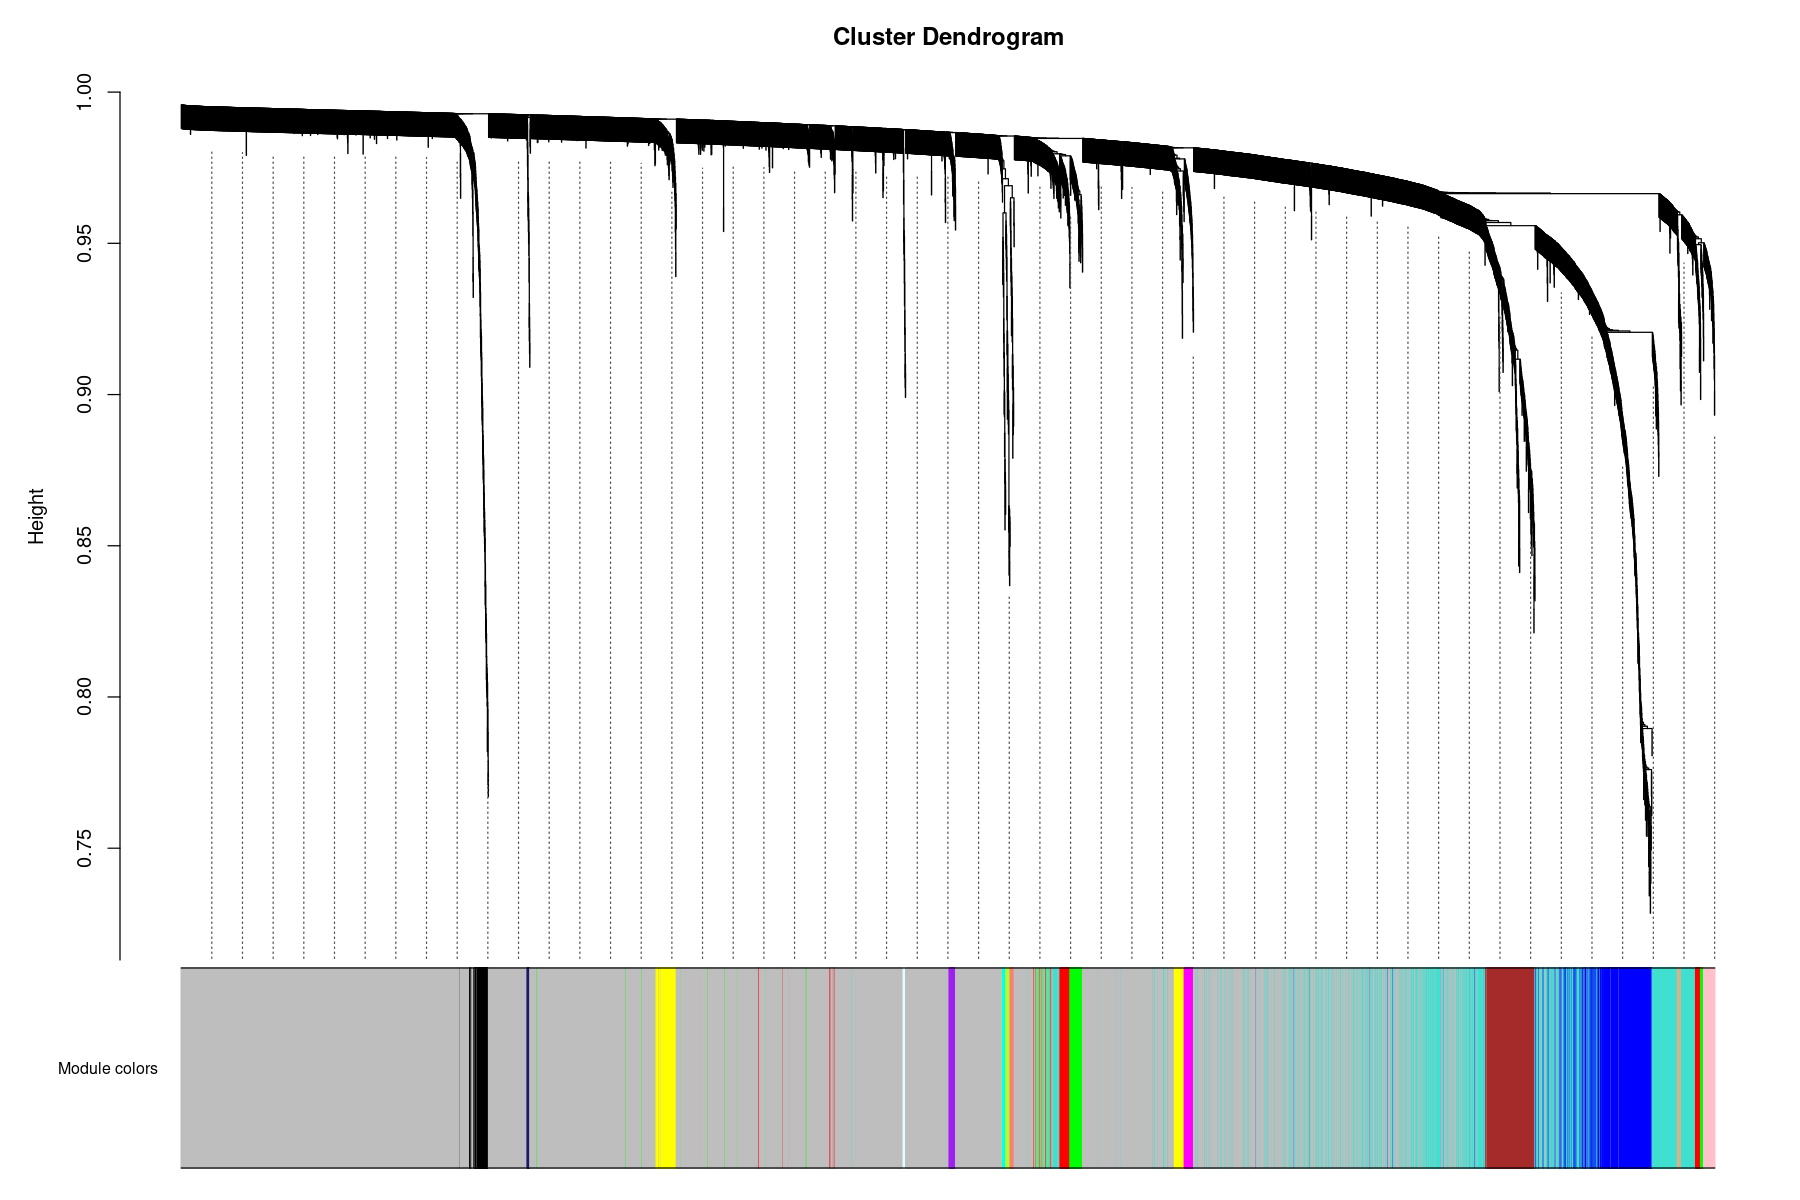

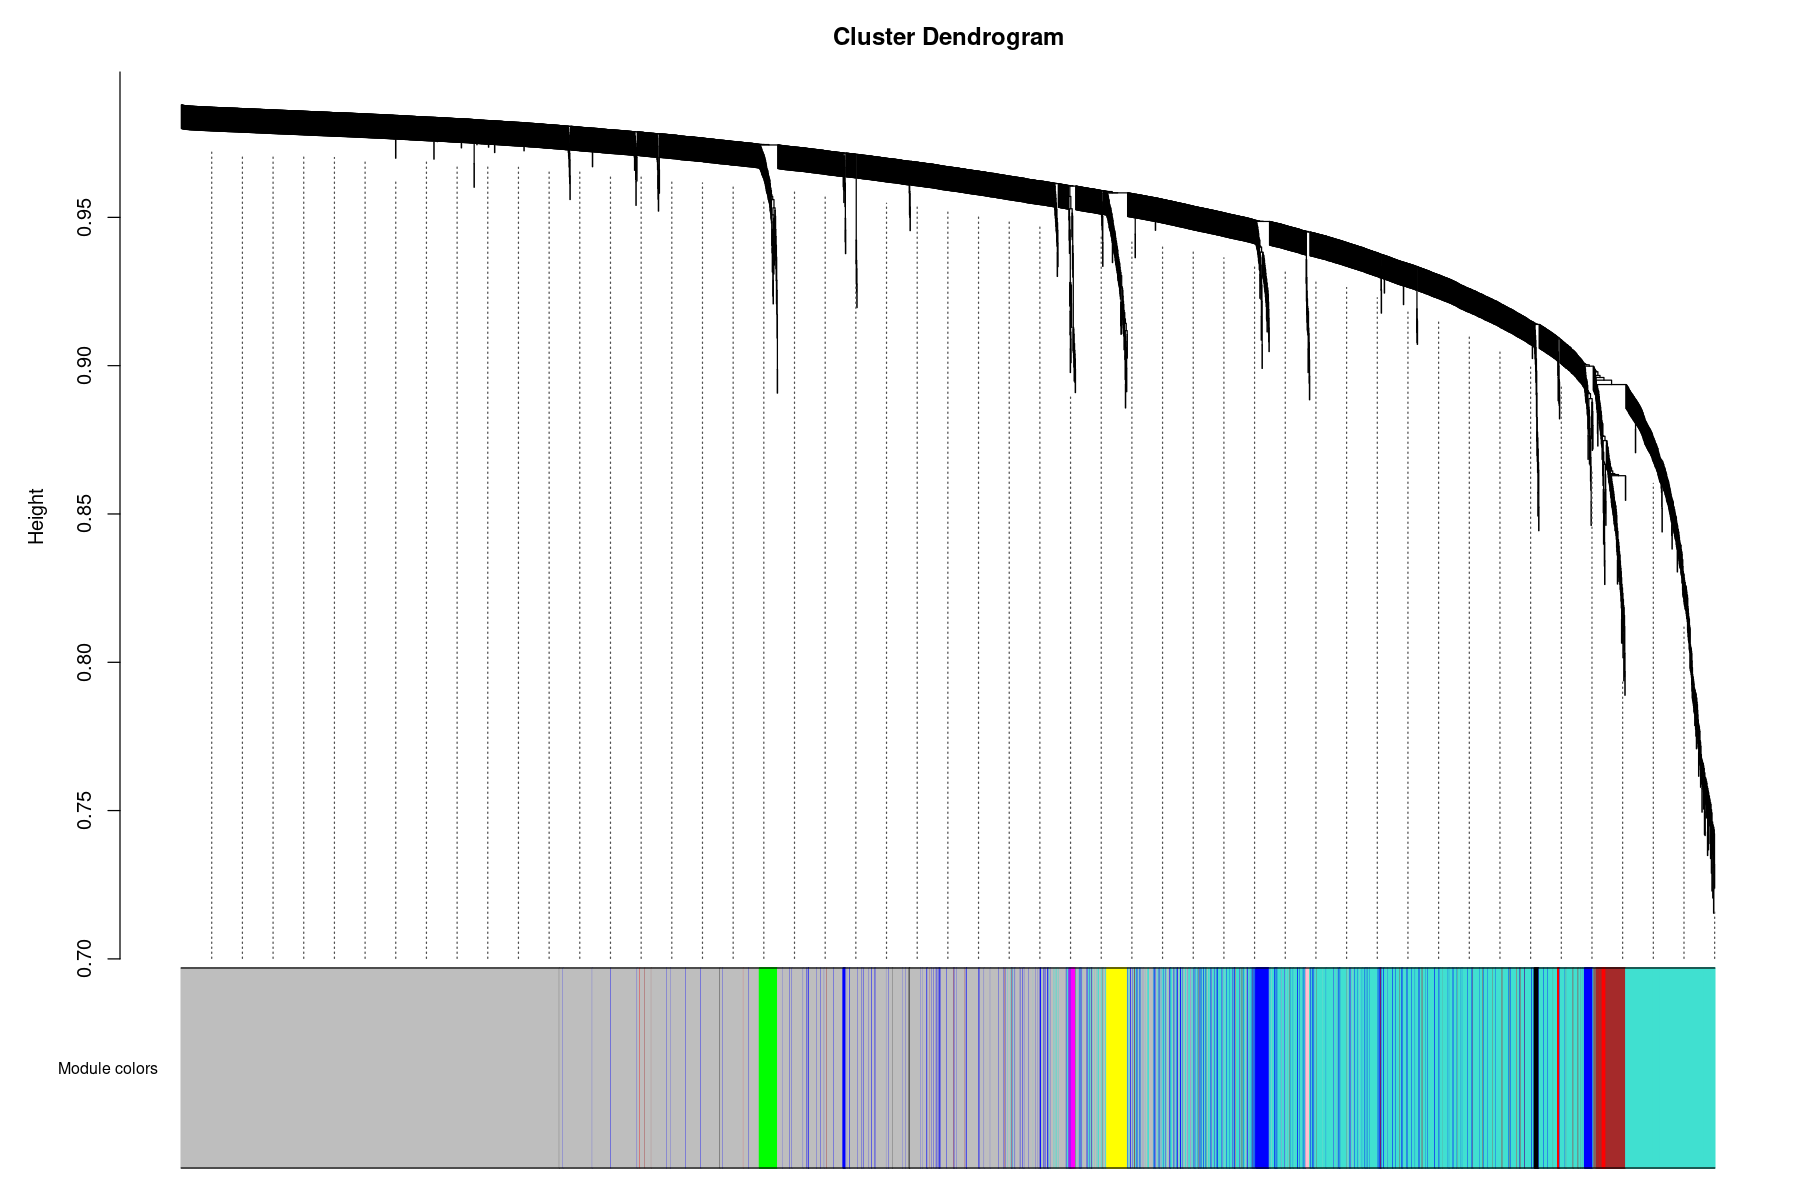

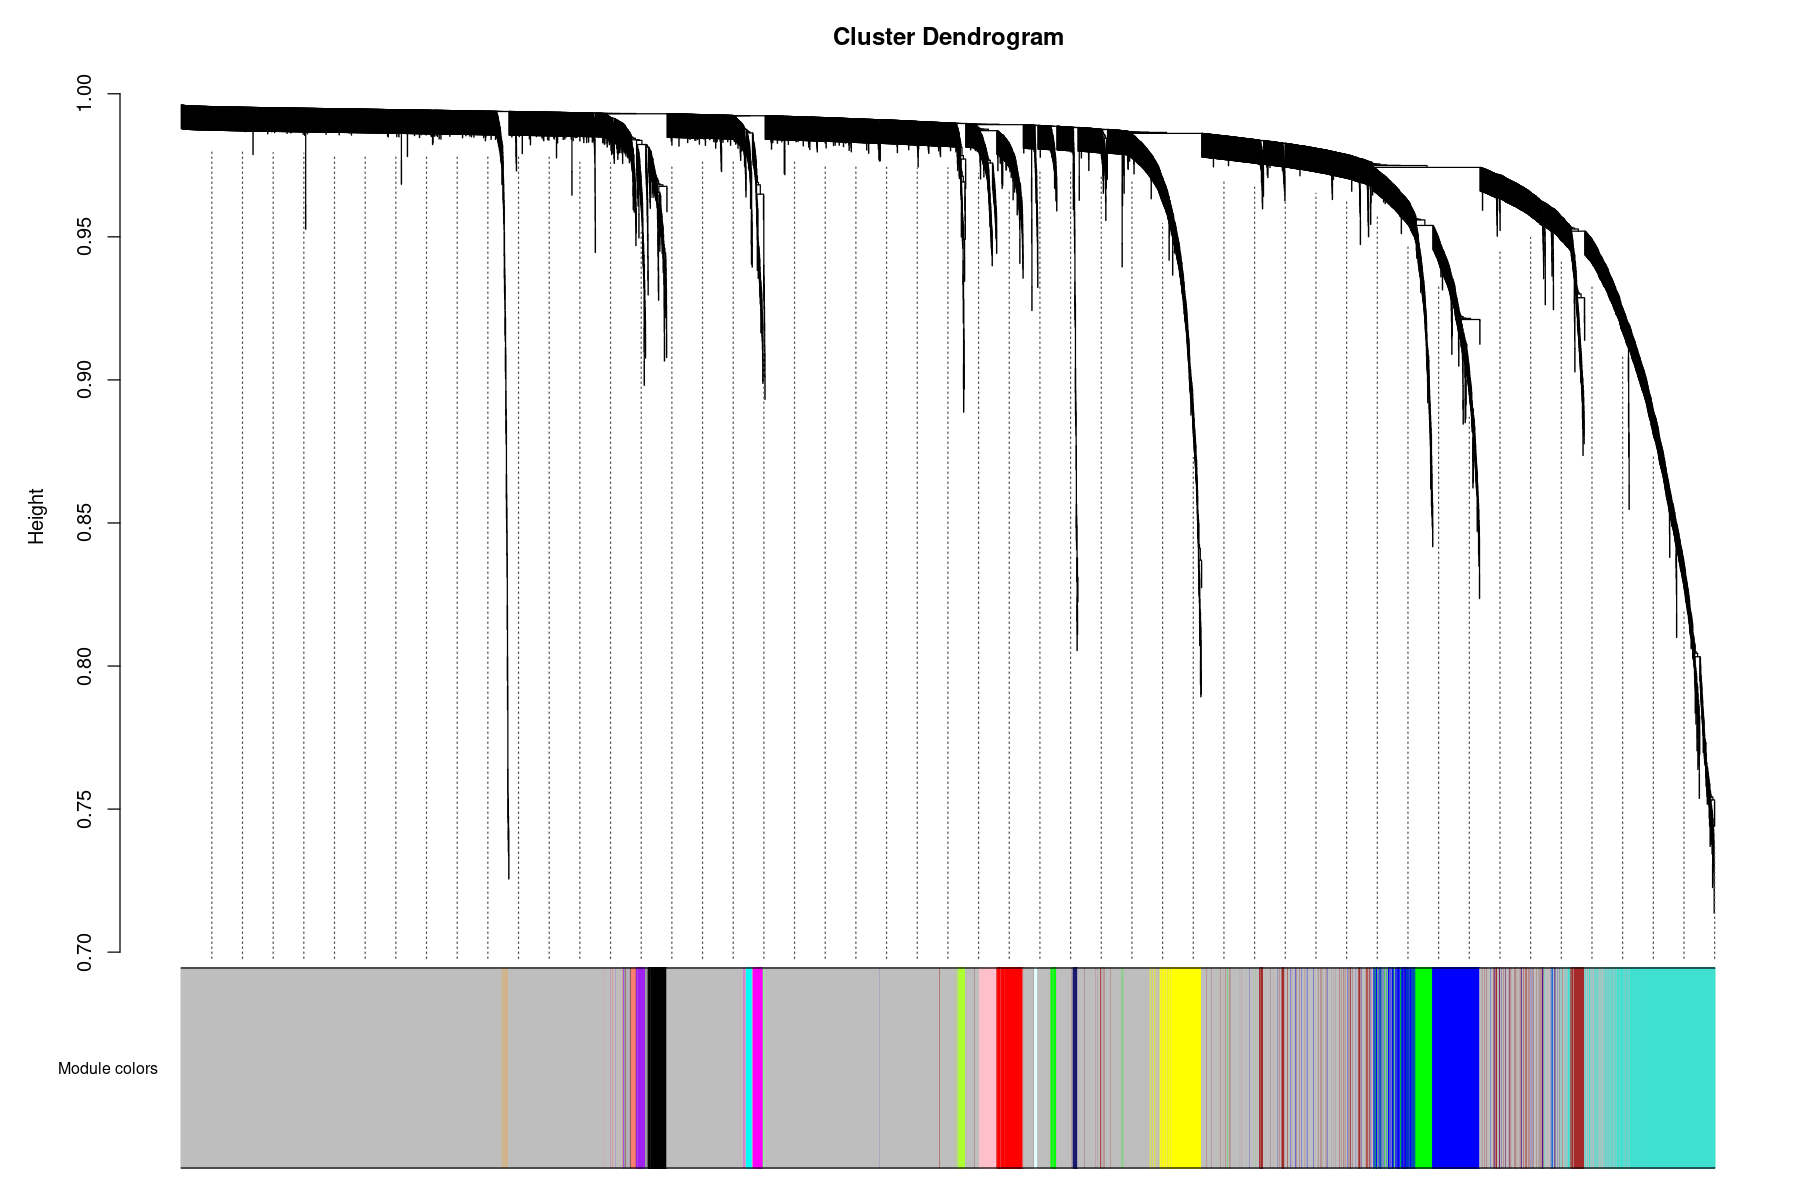

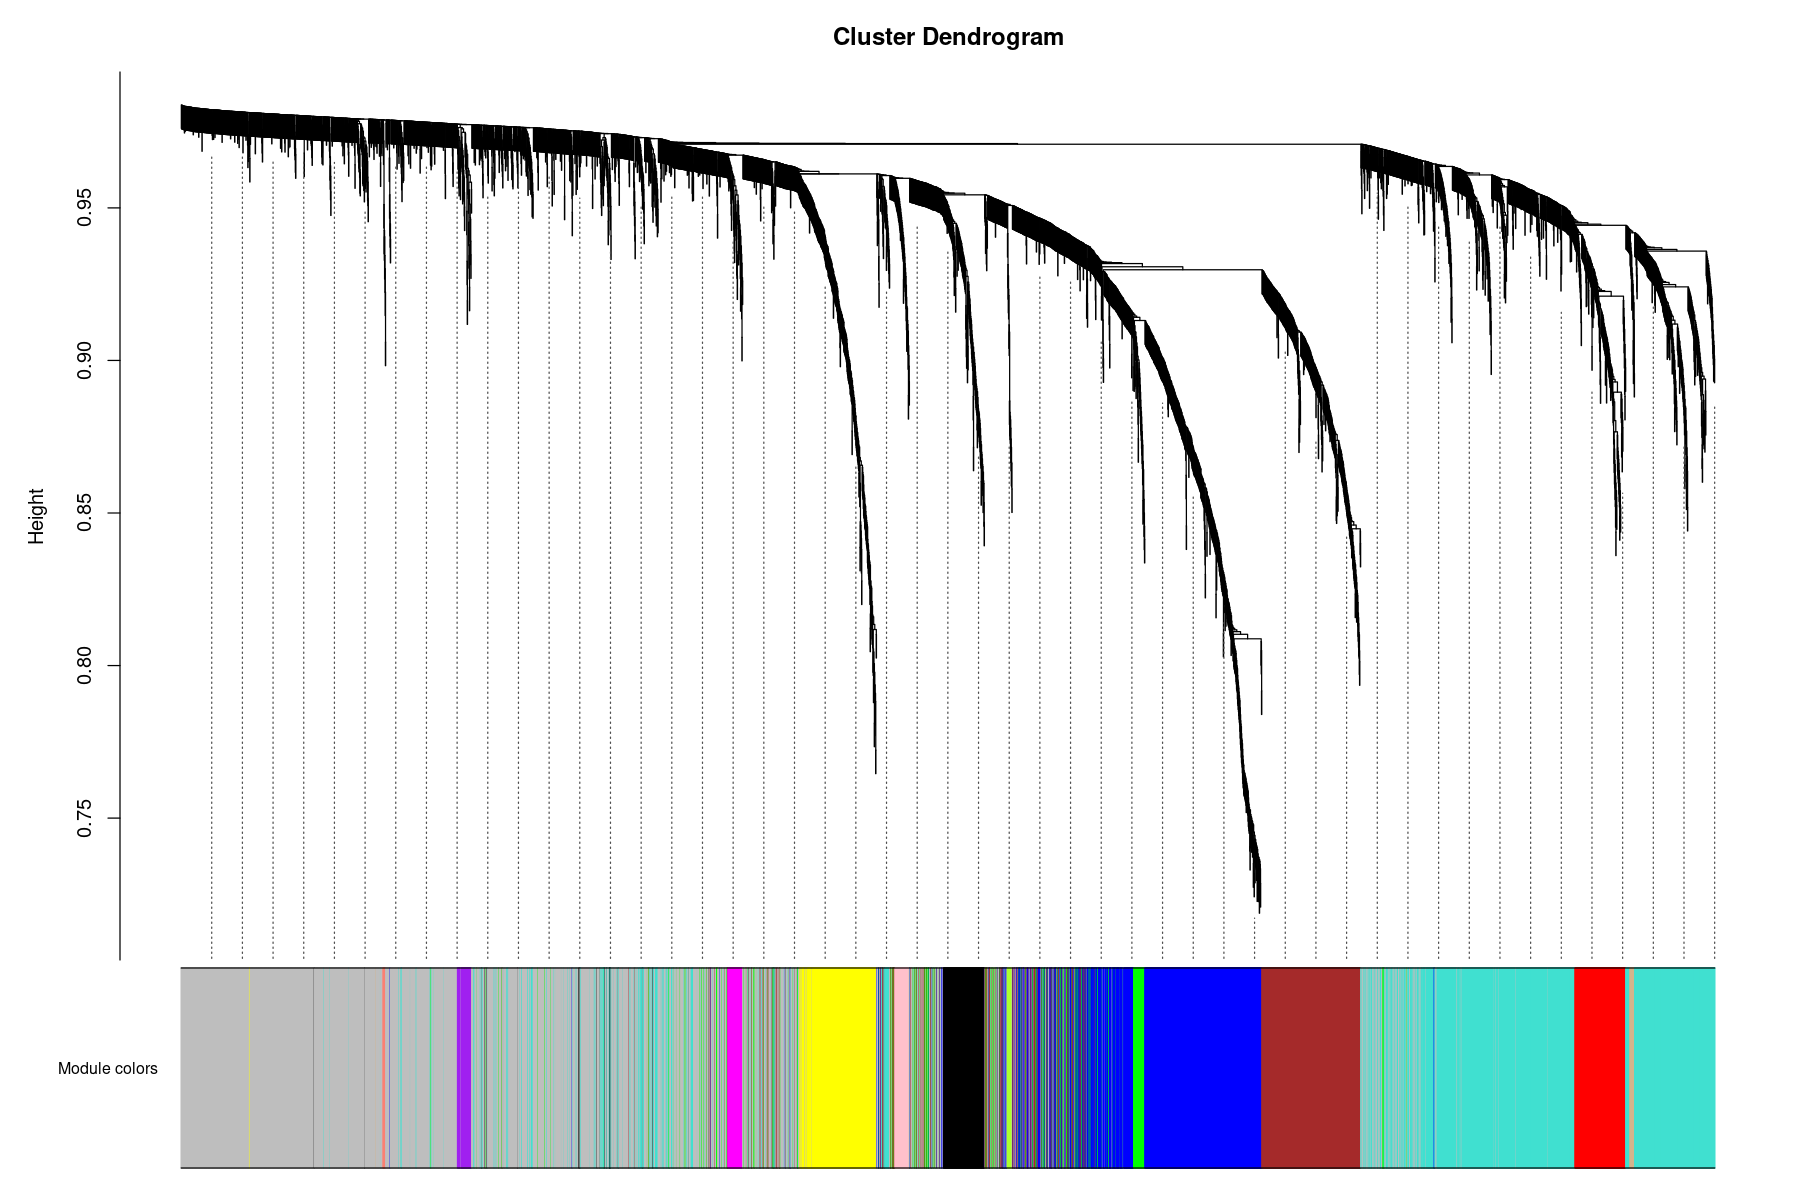

In [21]:
for(netC in blockWise_power2){
    # Convert labels to colors for plotting
    mergedColors = labels2colors(netC$colors)
    # Plot the dendrogram and the module colors underneath
    plotDendroAndColors(netC$dendrograms[[1]], mergedColors[netC$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)
}

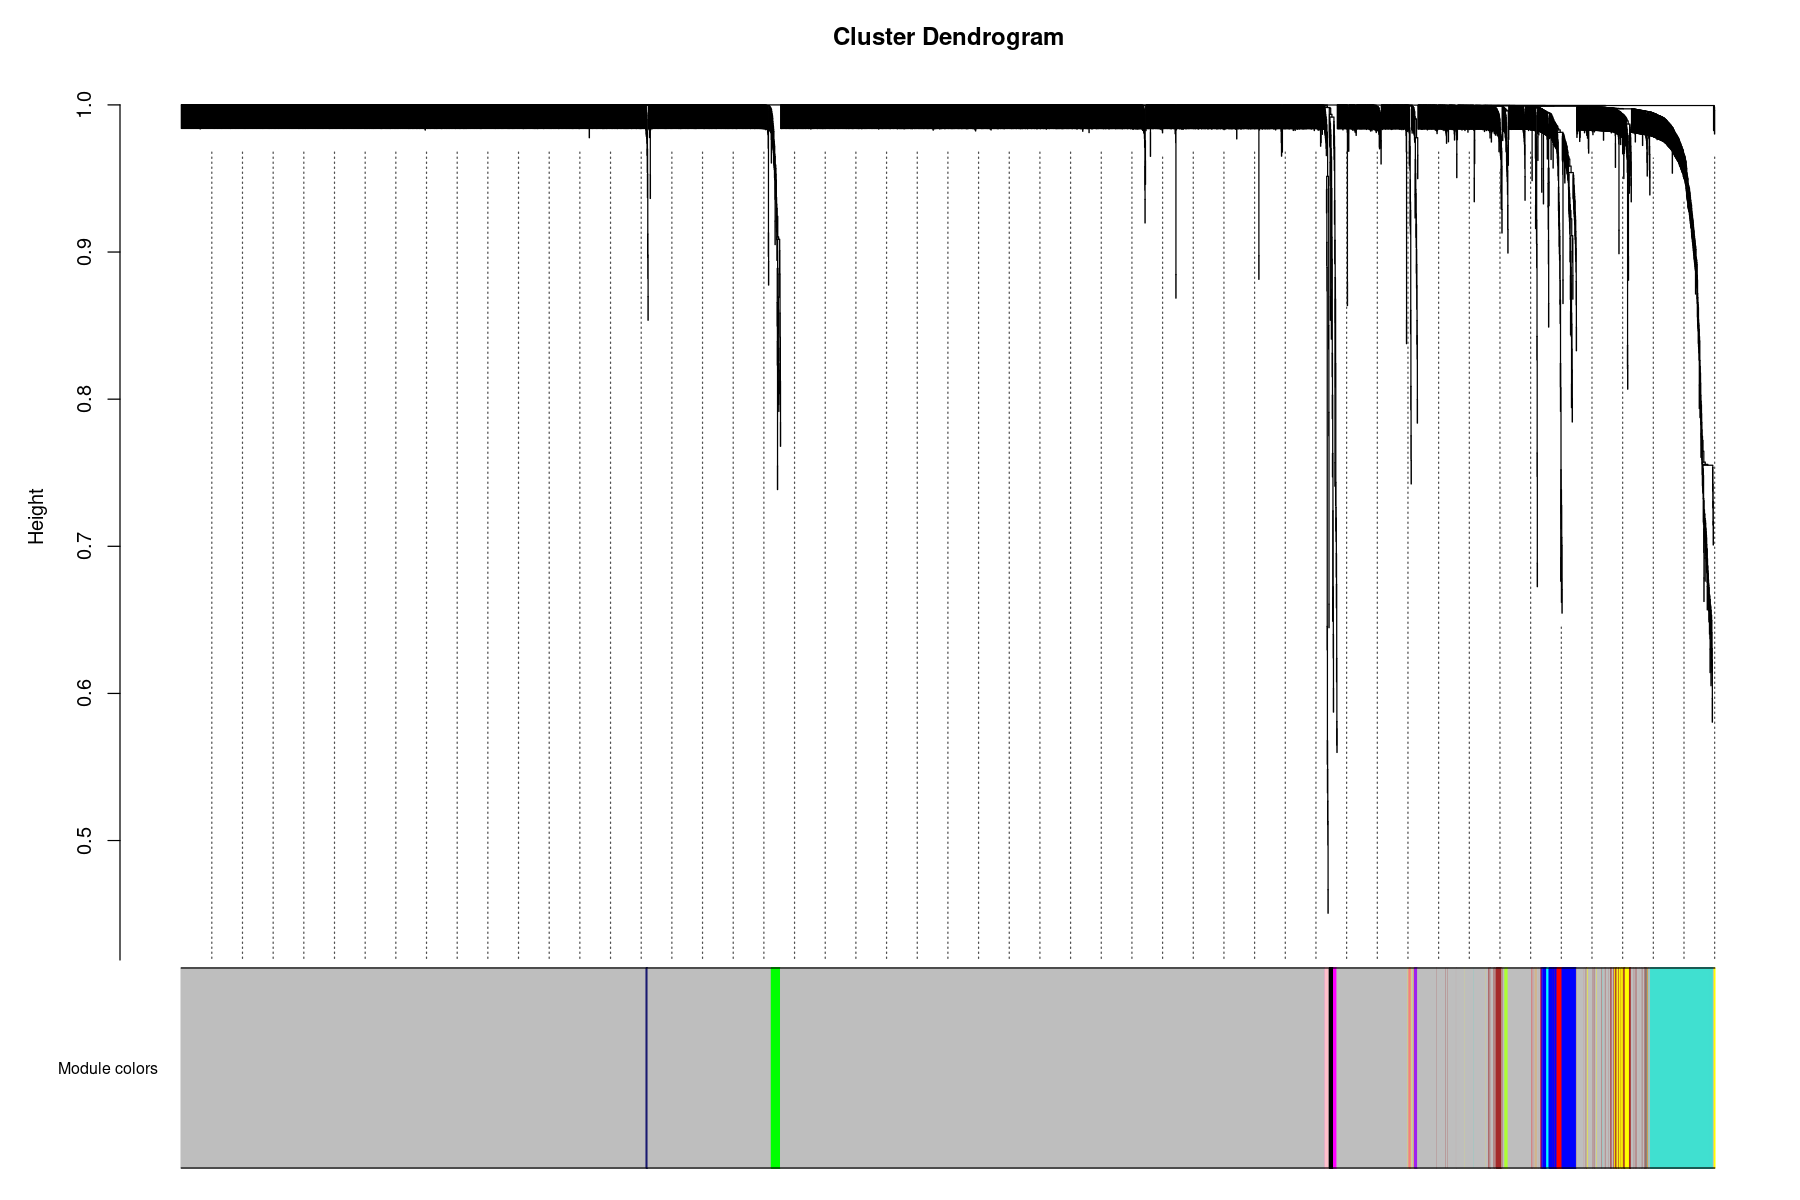

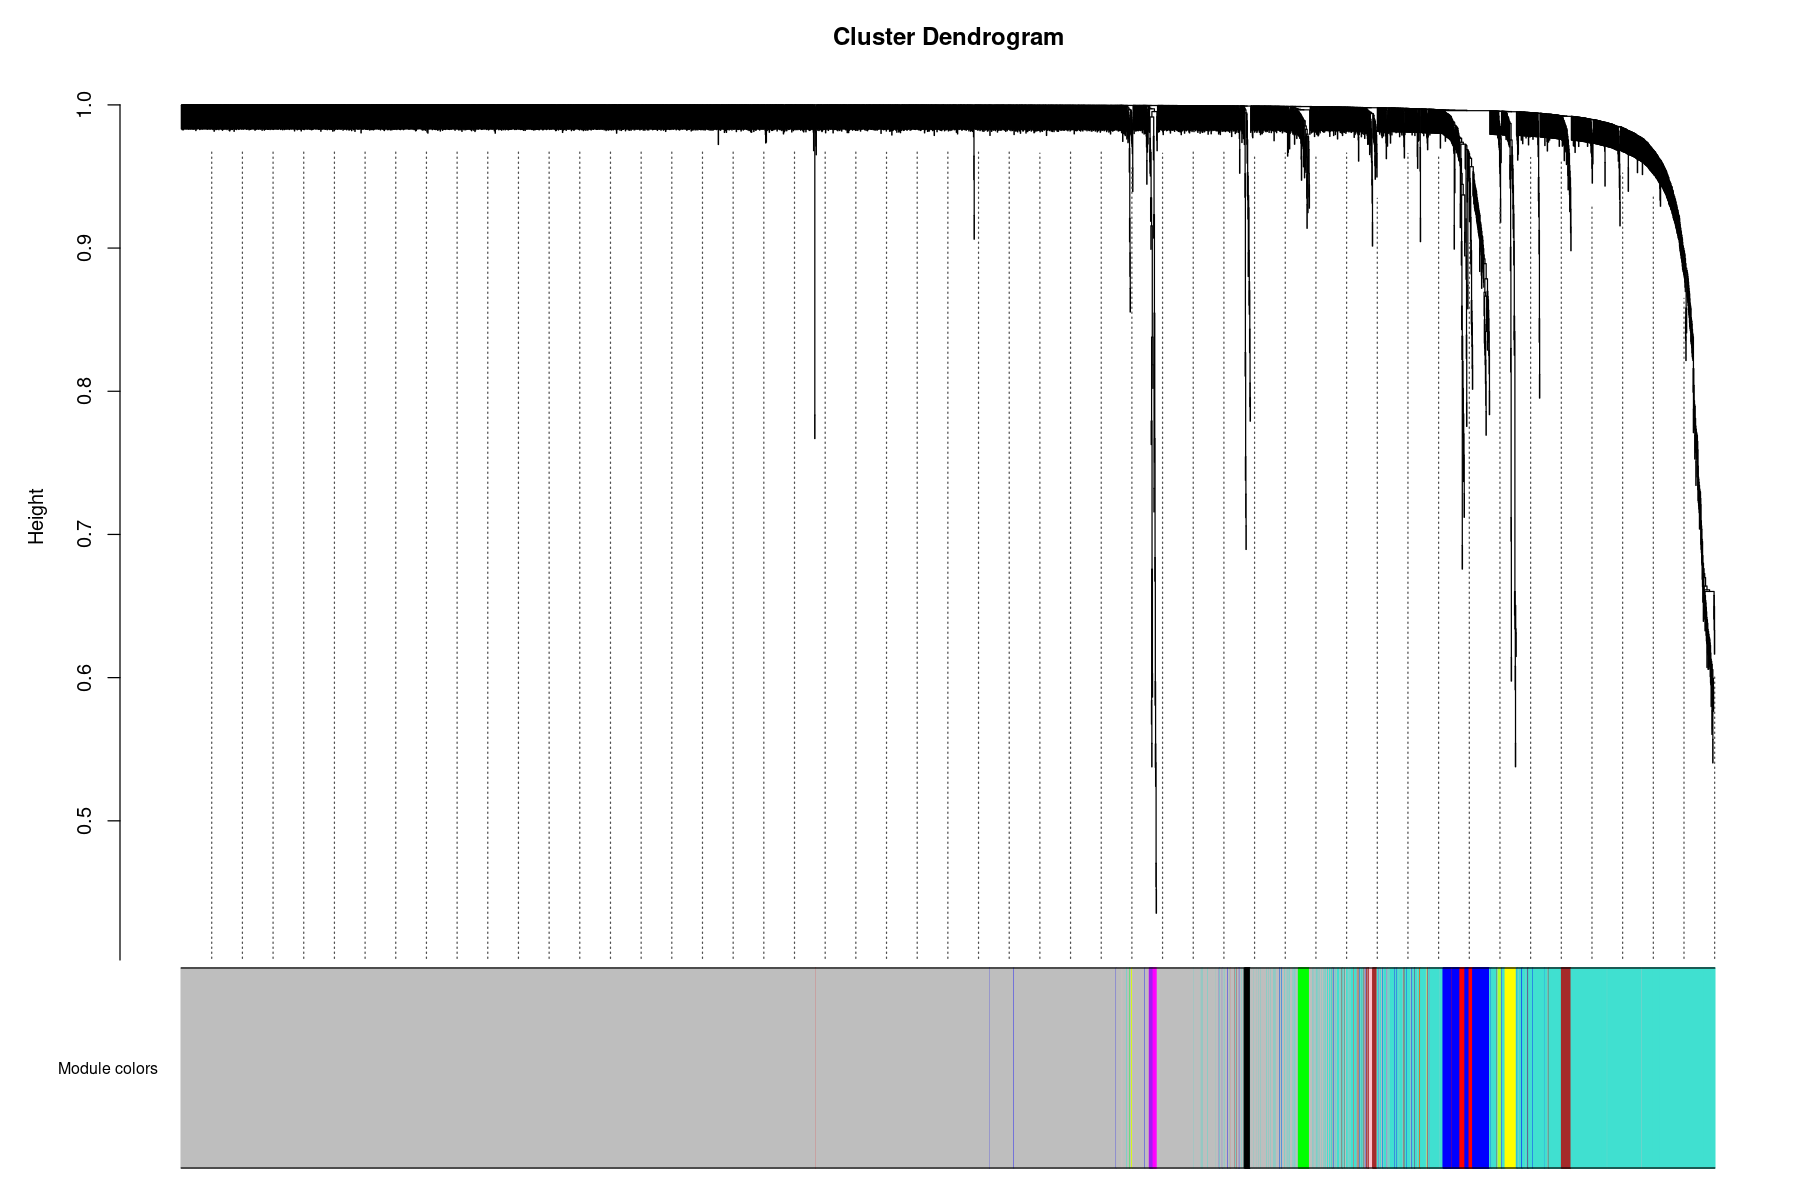

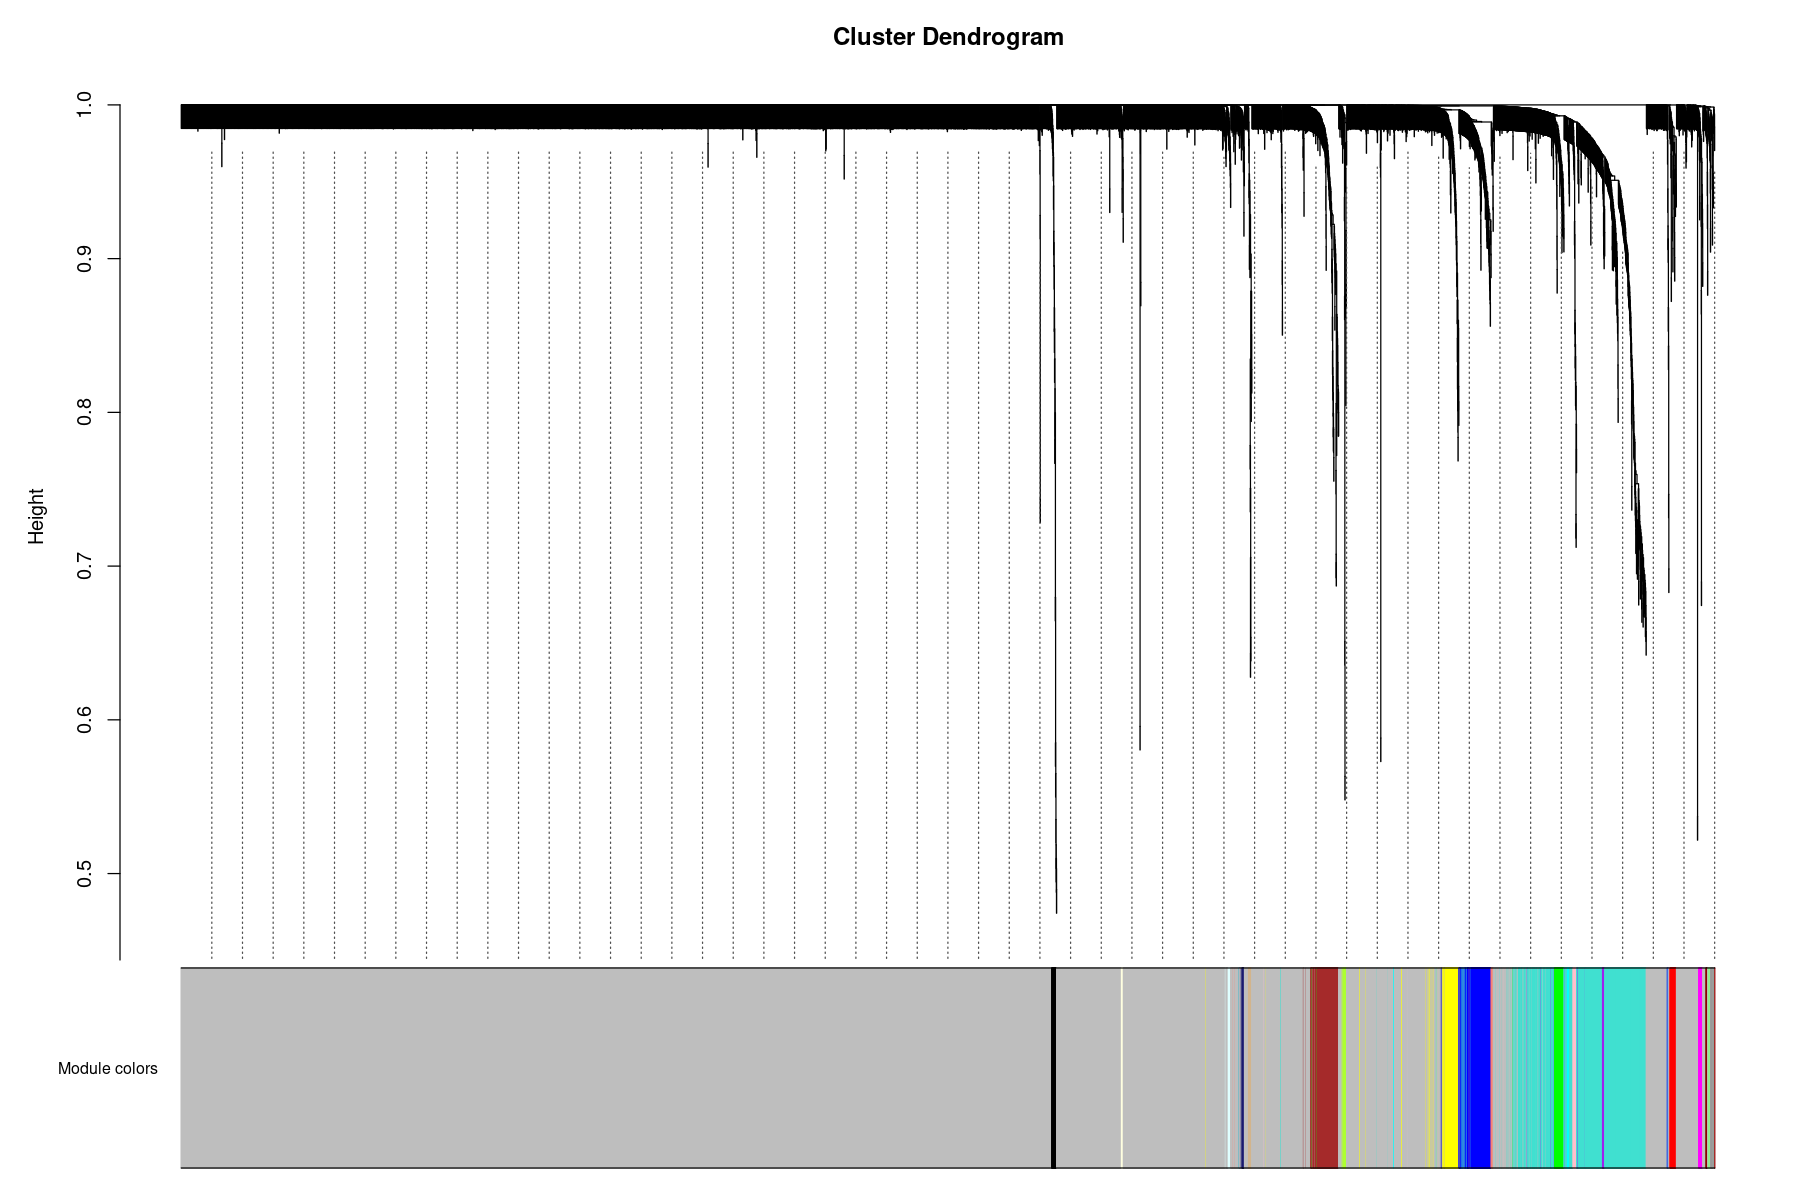

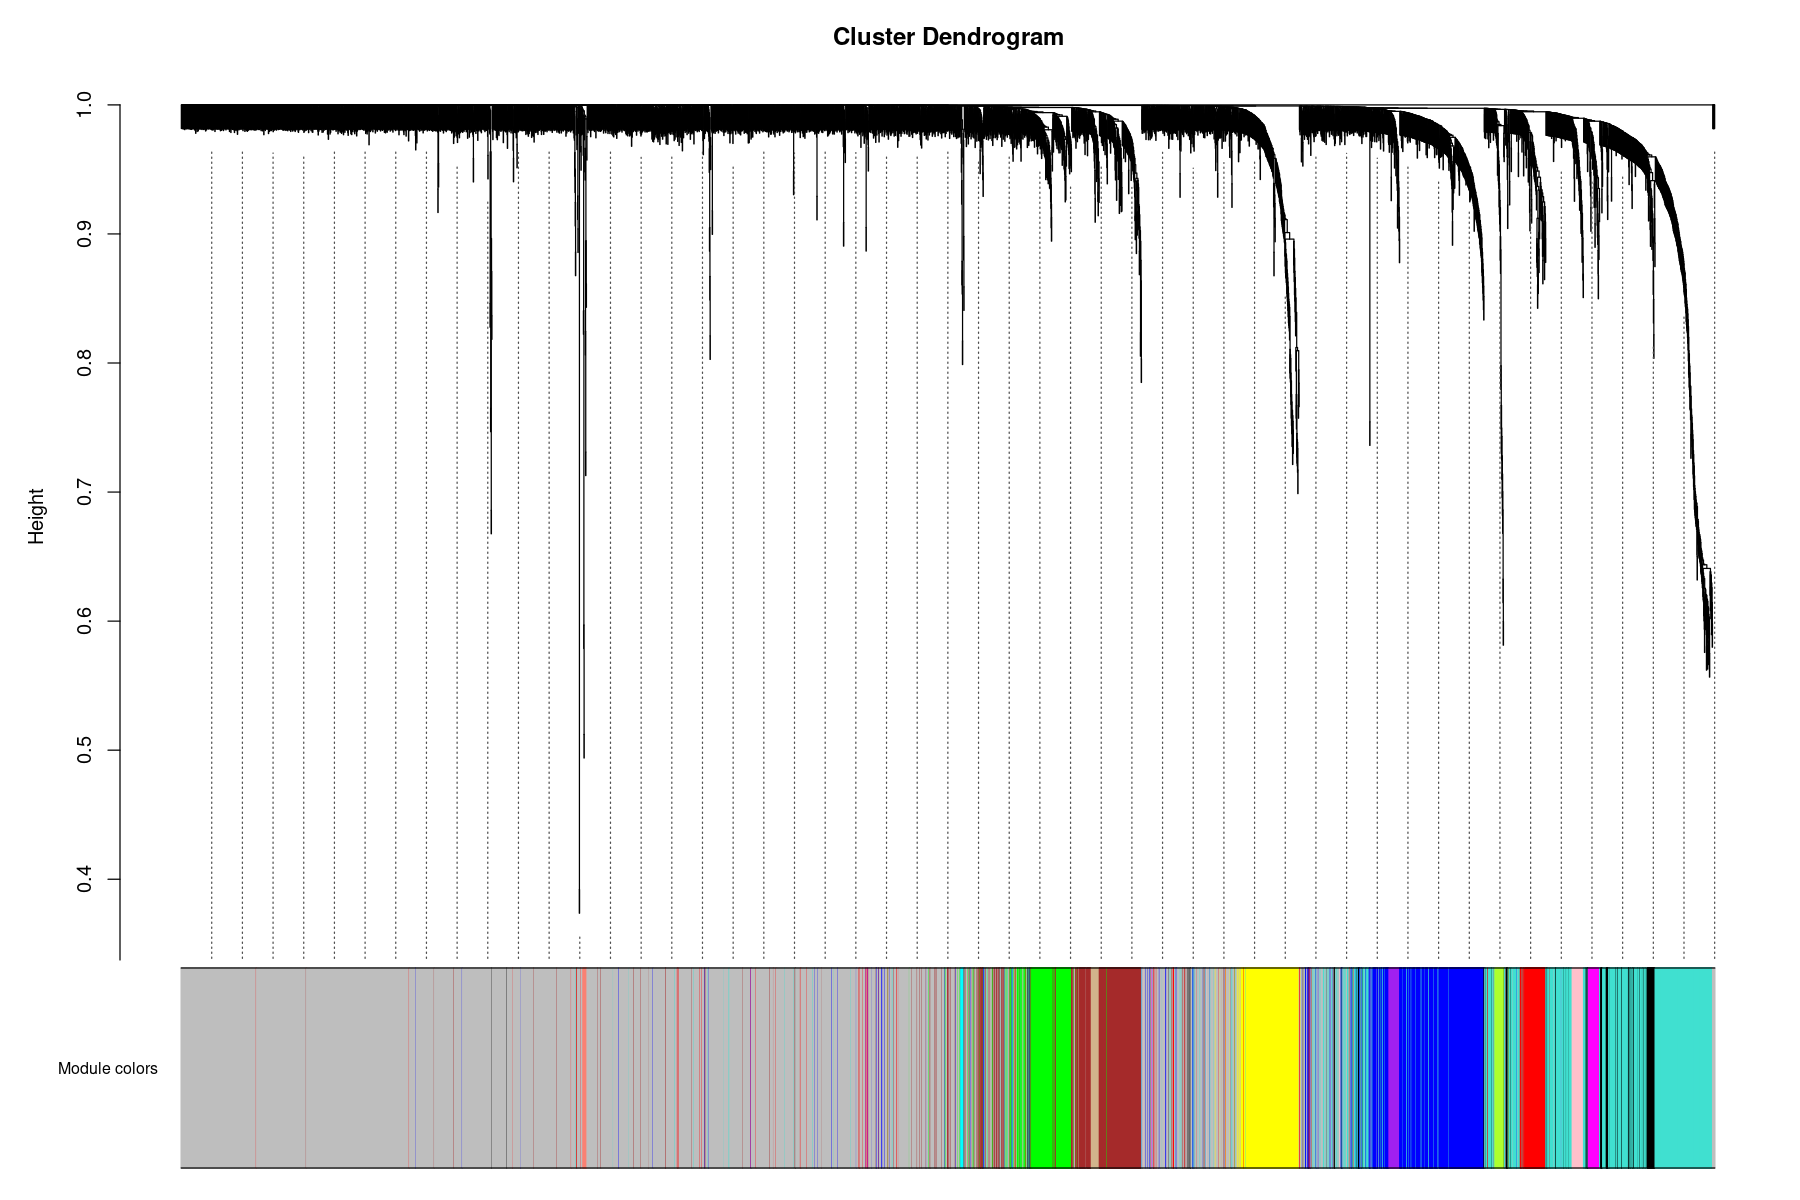

In [22]:
for(netC in blockWise_power6){
    # Convert labels to colors for plotting
    mergedColors = labels2colors(netC$colors)
    # Plot the dendrogram and the module colors underneath
    plotDendroAndColors(netC$dendrograms[[1]], mergedColors[netC$blockGenes[[1]]],
    "Module colors",
    dendroLabels = FALSE, hang = 0.03,
    addGuide = TRUE, guideHang = 0.05)
}

In [23]:
llply(blockWise_power2, function(x) table(x$colors))

$body_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
5876  988  394  264  158  114  104   86   59   50   35   25   25   22   17   15 
  16 
  13 

$body_high

   0    1    2    3    4    5    6    7    8    9   10 
3235 1569  359  142   74   66   27   23   14   14   10 

$head_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6160  664  449  290  237  164  144  112   93   60   57   44   39   38   31   26 
  16   17   18 
  18   15   10 

$head_high

   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
2095 1206  718  531  274  203  186  166   54   54   51   18   18   10 


In [24]:
llply(blockWise_power6, function(x) table(x$colors))

$body_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
7331  344  144  119   72   50   38   23   21   20   19   17   12   12   12   11 

$body_high

   0    1    2    3    4    5    6    7    8    9   10   11 
4055 1030  167   82   45   42   35   22   16   15   13   11 

$head_low

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
7213  644  165  158  114   56   36   28   24   23   23   21   19   18   17   17 
  16   17   18   19   20   21 
  16   15   13   11   10   10 

$head_high

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
3186  688  437  349  226  203  149  117   49   45   42   34   32   15   12 


In [25]:
datExpr = expr_list$head_high
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

moduleColors = blockWise_power2$head_high$colors

# Recalculate module eigengenes
MEs = moduleEigengenes(datExpr, moduleColors)$eigengenes
# Add the weight to existing module eigengenes
MET = orderMEs(MEs)
# Plot the relationships among the eigengenes and the trait
#sizeGrWindow(5,7.5);
#par(cex = 0.9)

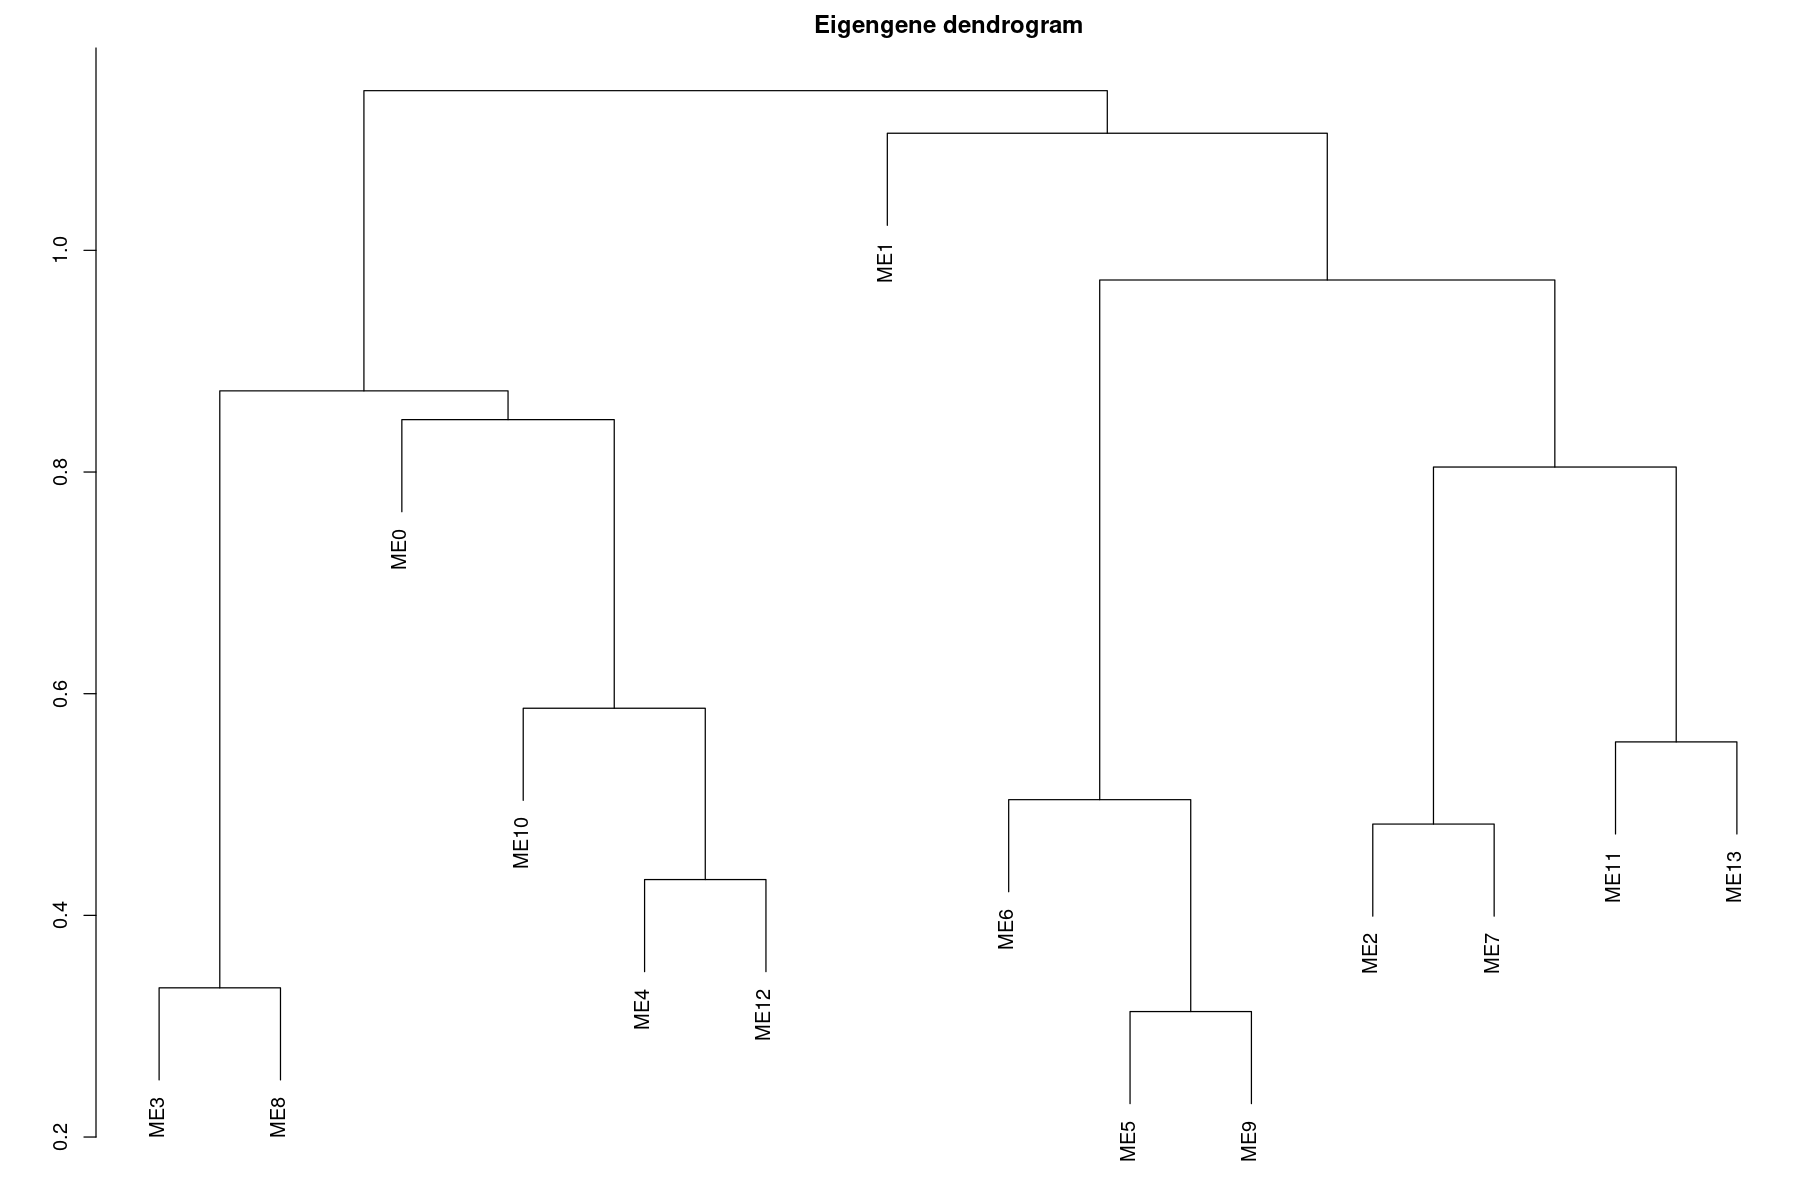

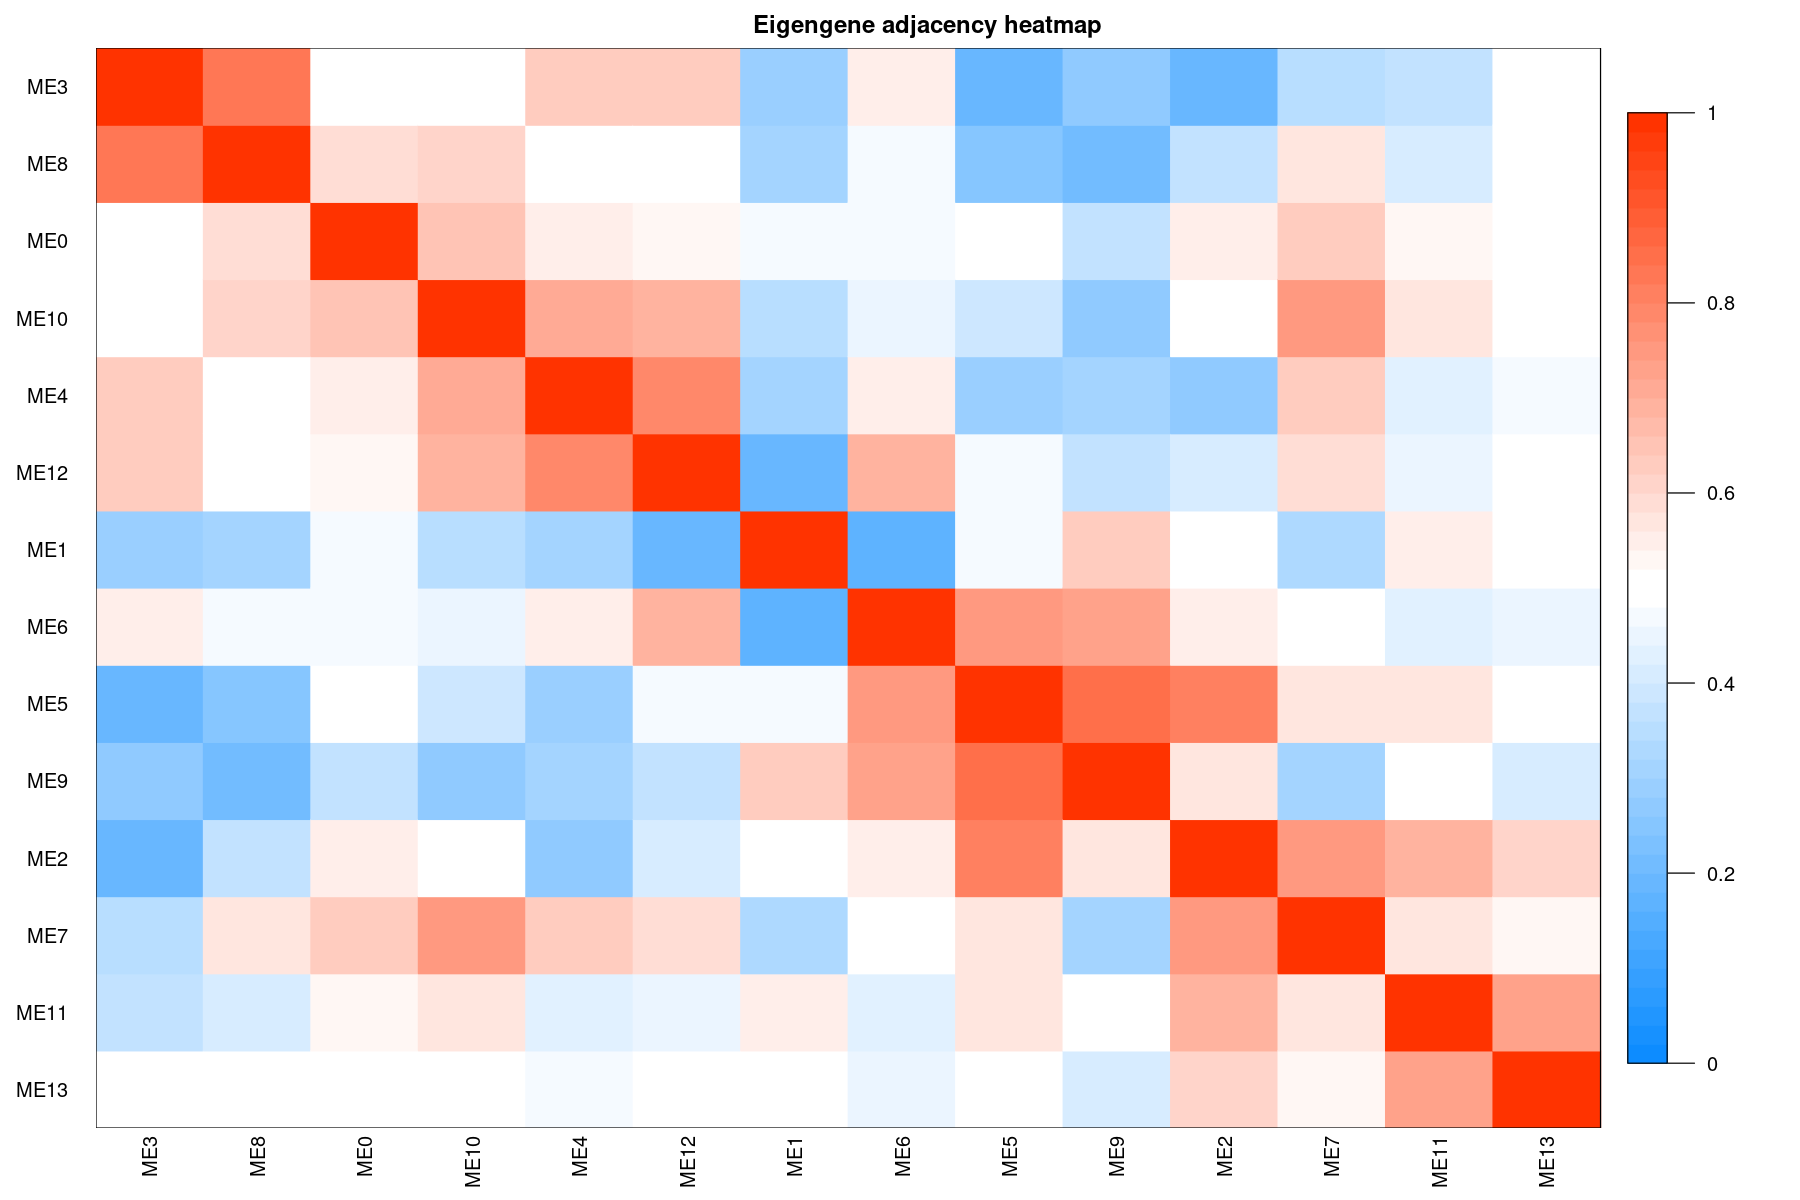

In [26]:
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene dendrogram", marDendro = c(0,4,2,0),
plotHeatmaps = FALSE)
# Plot the heatmap matrix (note: this plot will overwrite the dendrogram plot)
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene adjacency heatmap", marHeatmap = c(3,4,2,2),
plotDendrograms = FALSE, xLabelsAngle = 90)

In [ ]:
dissTOM_list = llply(expr_list, function(datExpr) 1-TOMsimilarityFromExpr(datExpr, power = 2), .parallel = TRUE)

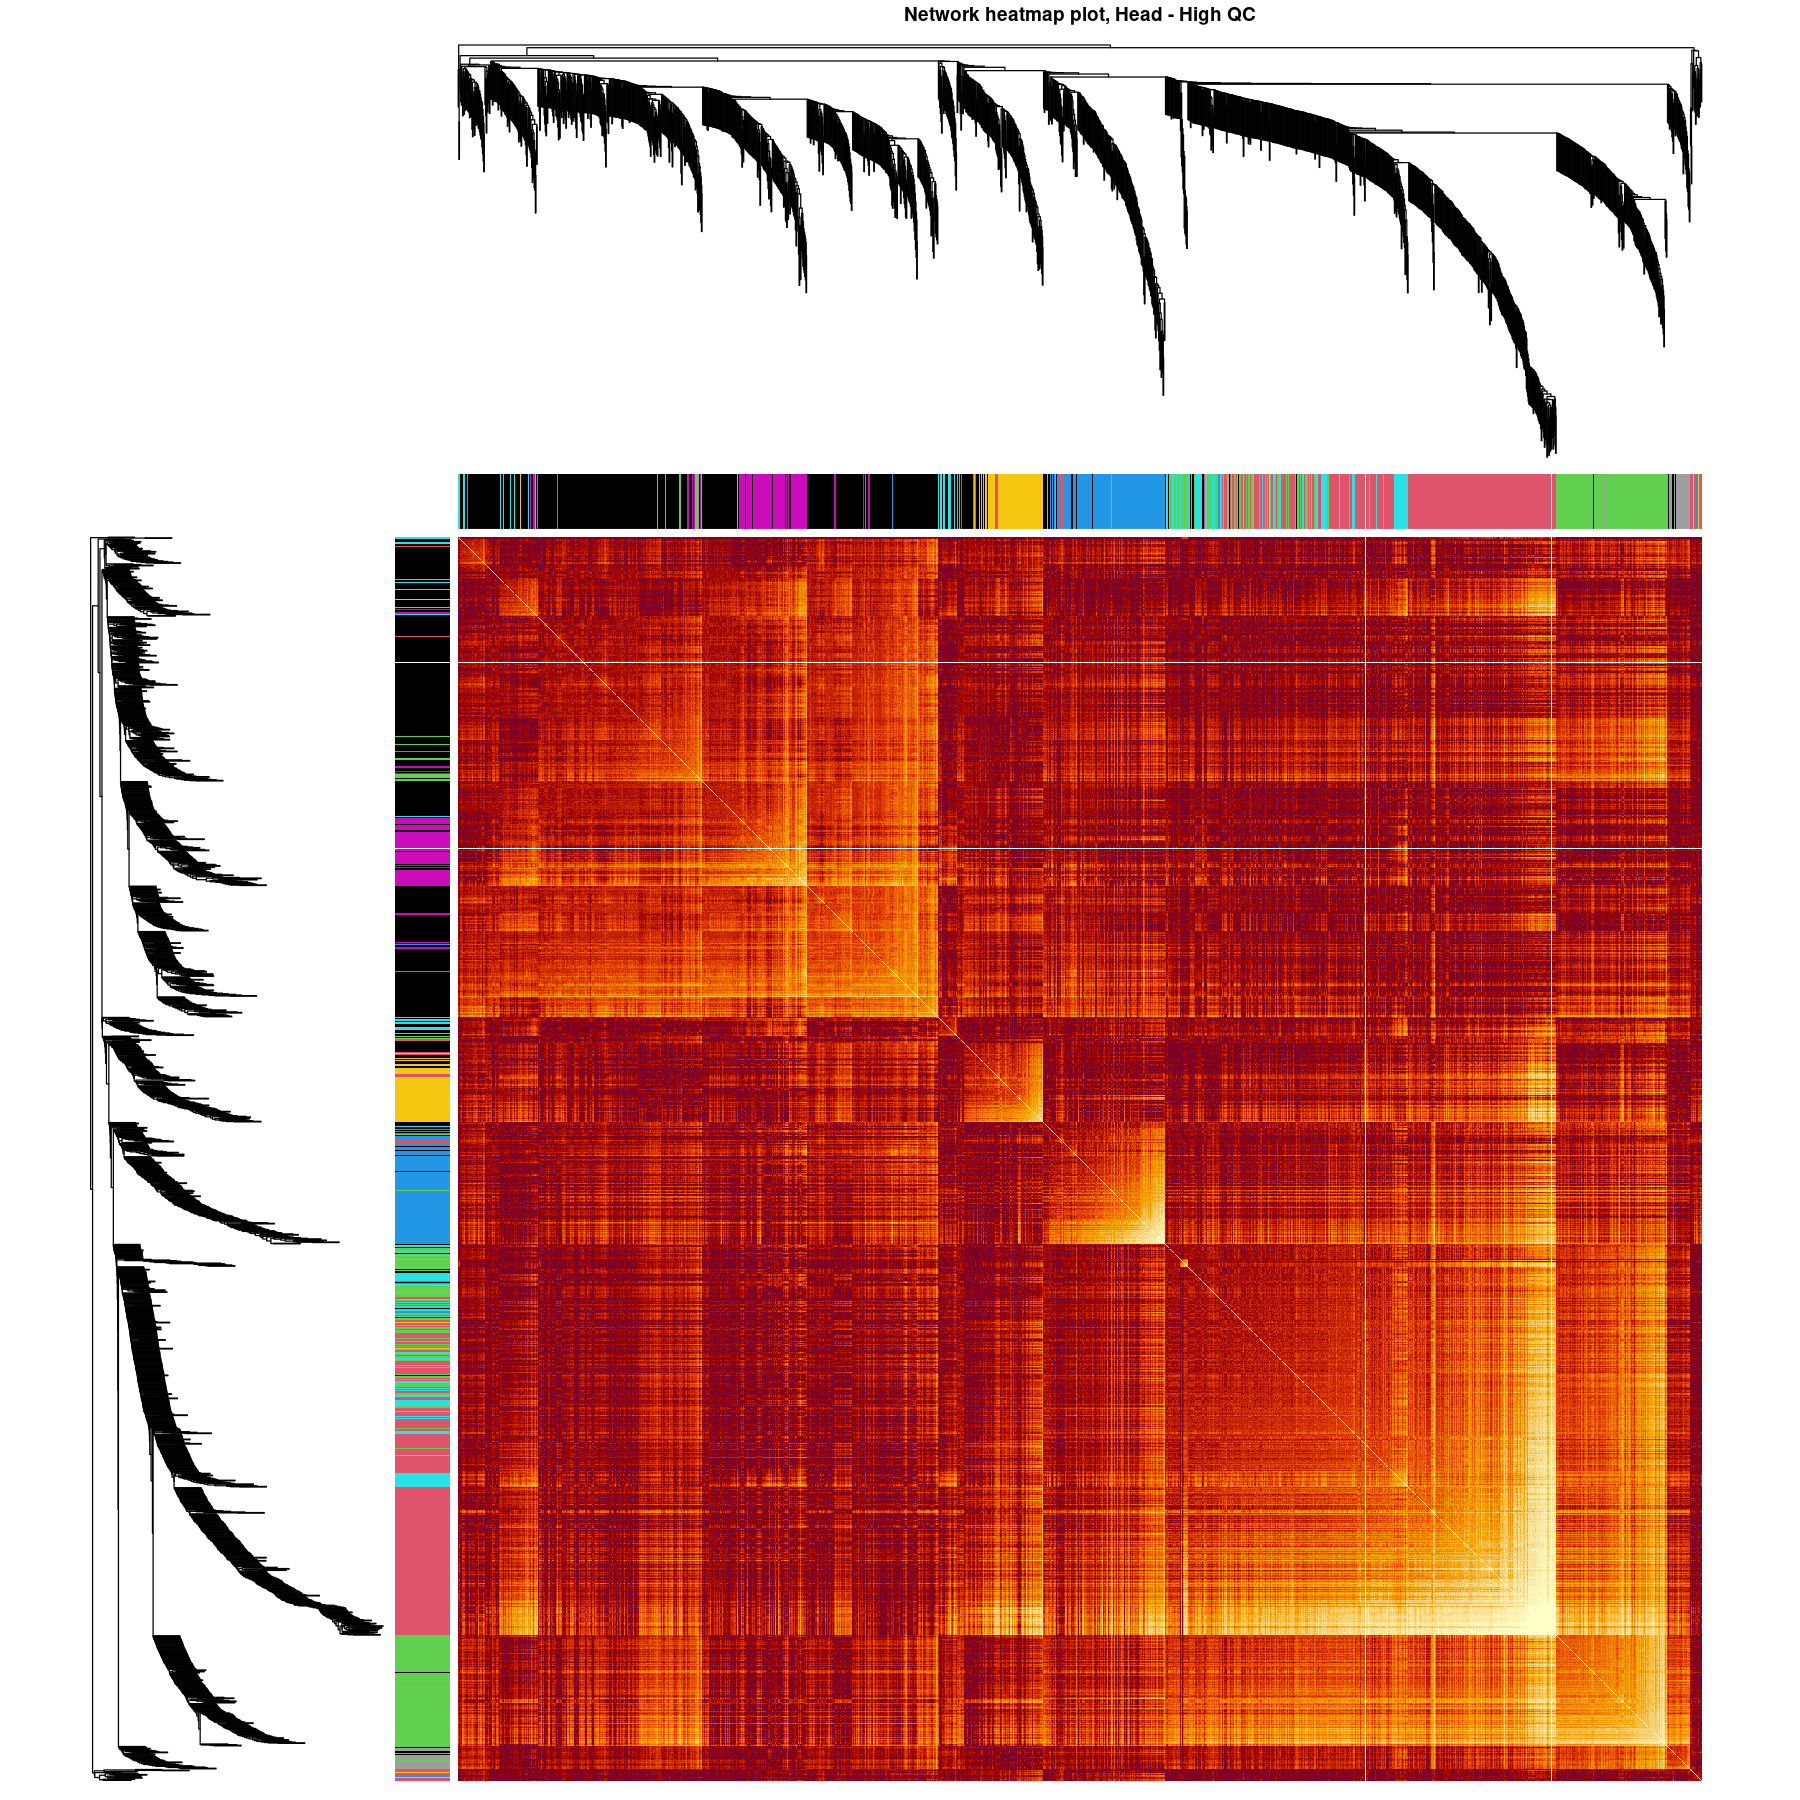

In [31]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "head_high"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Head - High QC")

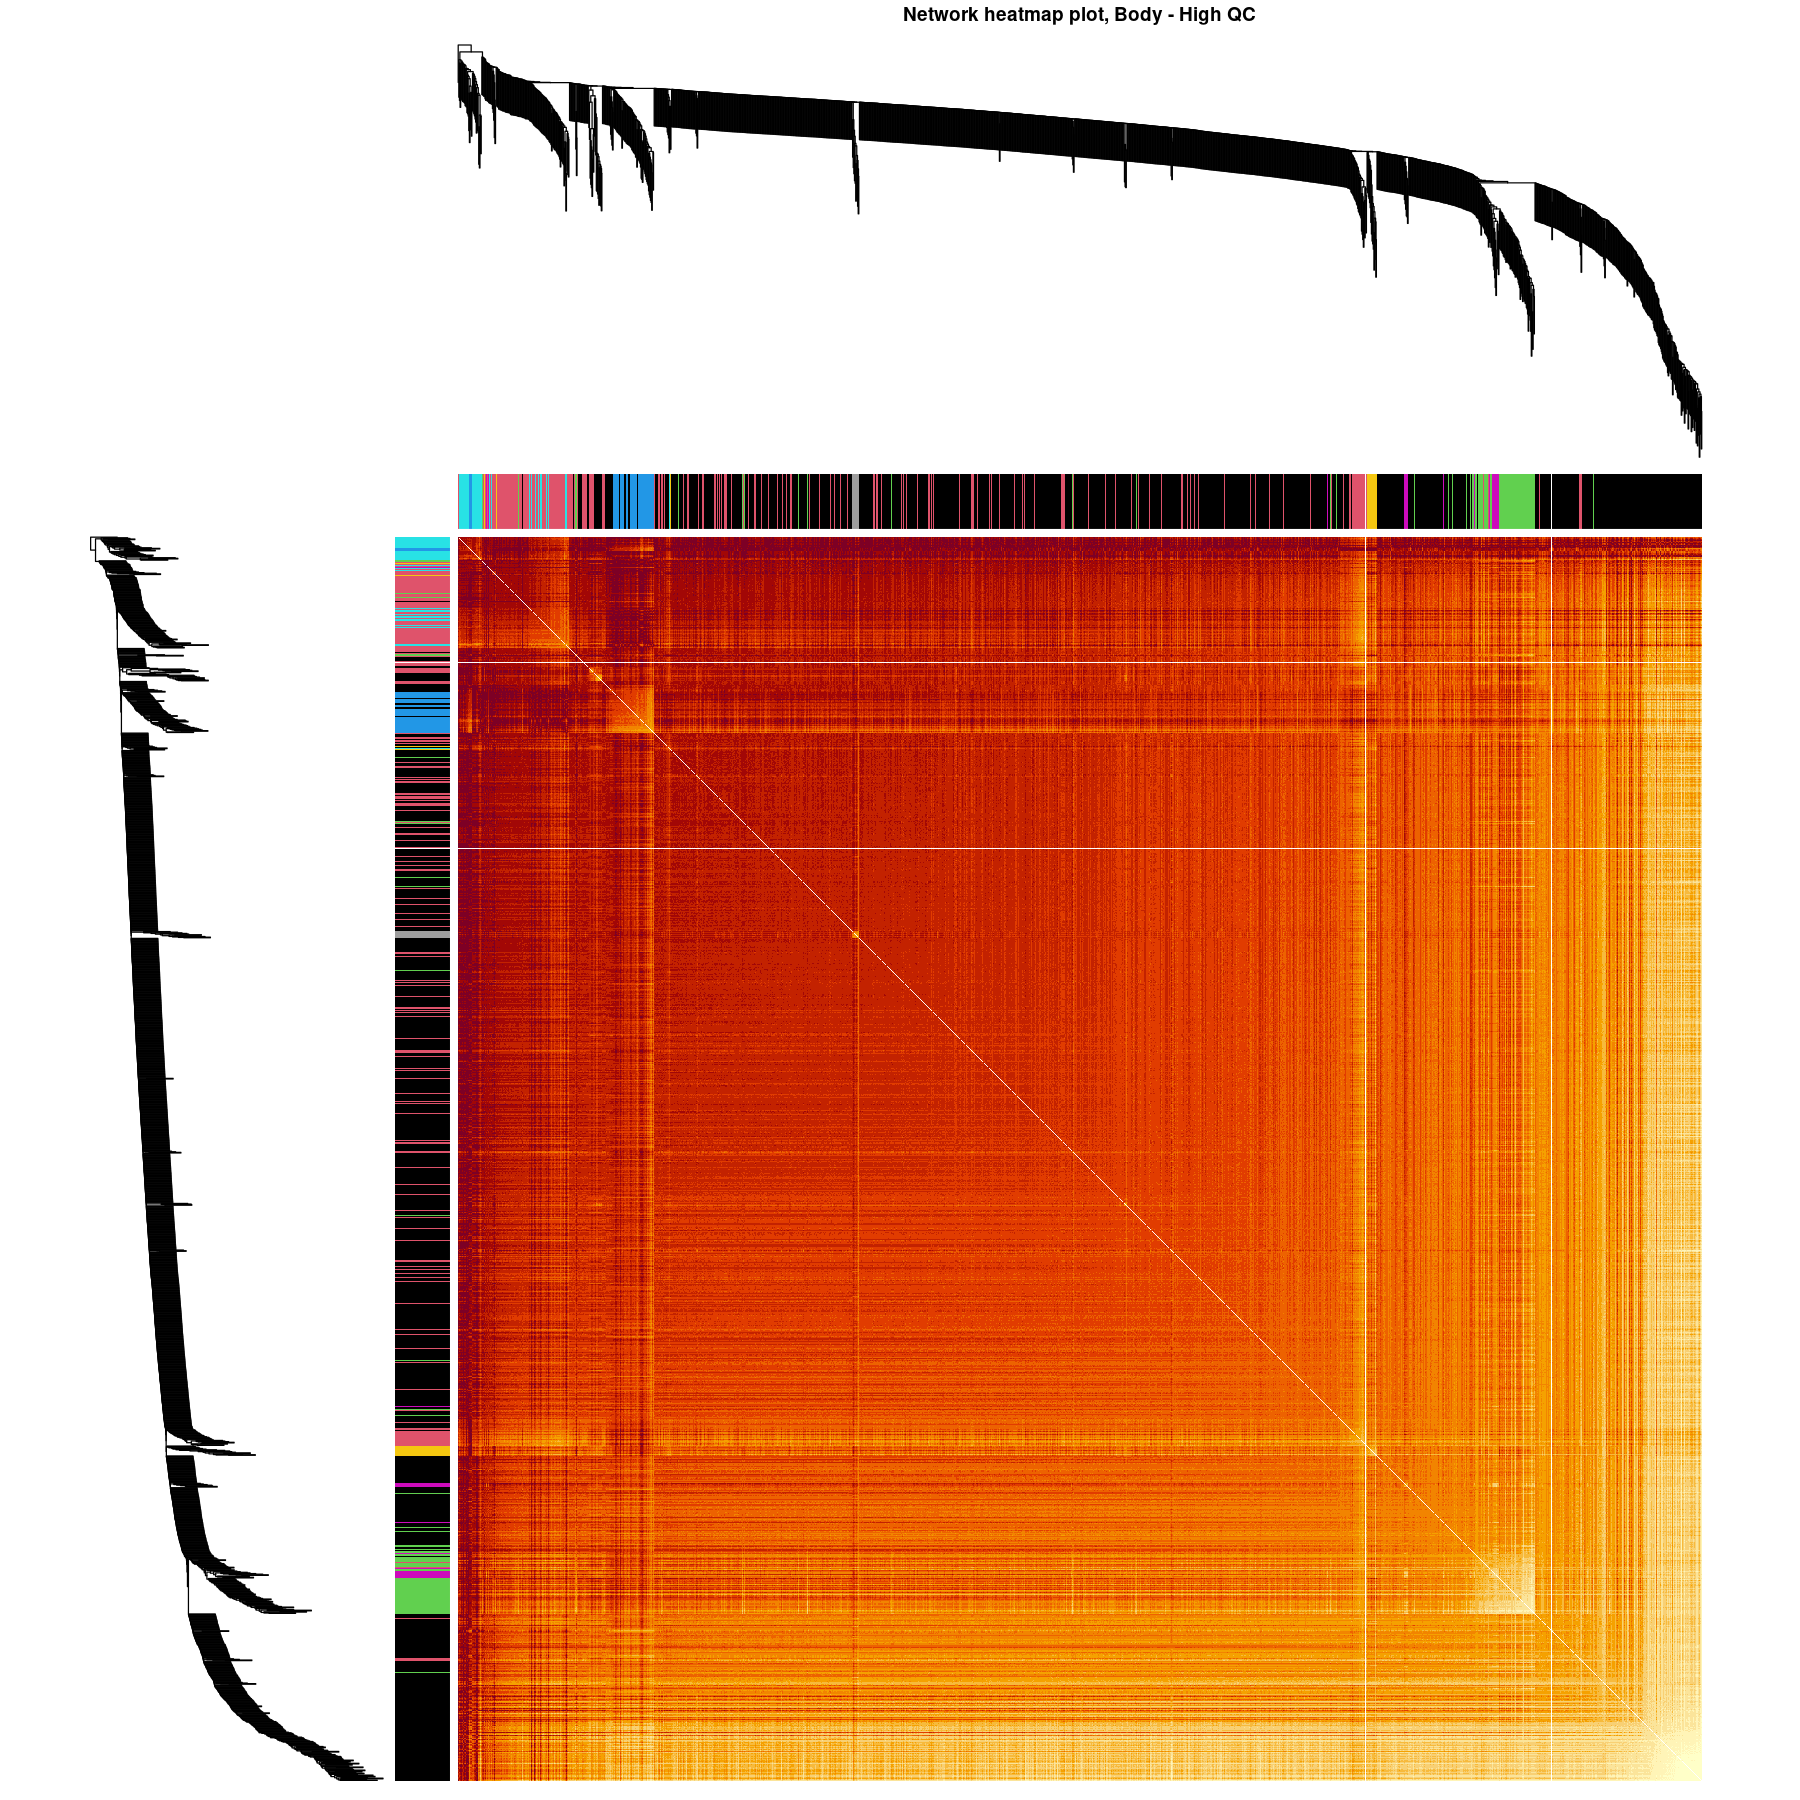

In [32]:
options(repr.plot.width=15, repr.plot.height=15)

data_index = "body_high"

nGenes = ncol(expr_list[[data_index]])
nSamples = nrow(expr_list[[data_index]])
dissTOM = dissTOM_list[[data_index]]

nSelect = 2000
select = sample(nGenes, size = nSelect);
moduleColors = blockWise_power2[[data_index]]$colors
select = sample(which(moduleColors != 0), size = nSelect)

selectTOM = dissTOM[select, select];
selectTree = hclust(as.dist(selectTOM), method = "average")
selectColors = moduleColors[select];
plotDiss = selectTOM^7;
diag(plotDiss) = NA;
TOMplot(plotDiss, selectTree, selectColors, 
        main = "Network heatmap plot, Body - High QC")

In [33]:
data.frame(genes = names(blockWise_power2$body_high$colors),
           modules = blockWise_power2$body_high$colors)

,genes,modules
,<chr>,<dbl>
FBgn0052350,FBgn0052350,0
FBgn0024733,FBgn0024733,1
FBgn0040372,FBgn0040372,1
FBgn0023536,FBgn0023536,0
FBgn0023537,FBgn0023537,1
FBgn0029525,FBgn0029525,0
FBgn0040373,FBgn0040373,0
FBgn0025640,FBgn0025640,1
FBgn0025635,FBgn0025635,0


In [52]:
label = "head_high"
getModules = function(label) {
    x = blockWise_power2[[label]]
    tissue =  str_split(label, "_")[[1]][1]
    QC = str_split(label, "_")[[1]][2]
    data.frame(Gene = names(x$colors),
               WGCNA_modules = x$colors,
               tissue = tissue,
               QC = QC)
    }
(WGCNA_modules = ldply(names(blockWise_power2), getModules))
write_csv(WGCNA_modules, file = "../data/WGCNA_modules_bodyHead_Control.csv")

Gene,WGCNA_modules,tissue,QC
<chr>,<dbl>,<chr>,<chr>
FBgn0031081,0,body,low
FBgn0031080,0,body,low
FBgn0053217,0,body,low
FBgn0052350,0,body,low
FBgn0024733,2,body,low
FBgn0040372,1,body,low
FBgn0000316,0,body,low
FBgn0029524,0,body,low
FBgn0023536,0,body,low


In [ ]:
Head_hsbm = read_csv("../data//1502genes-Control_Head-hsbm-fit_df.csv")
Head_hsbm$X1 = NULL
Head_hsbm$tissue = "head"
Head_hsbm$QC = "high"
Head_hsbm$B1 = as.numeric(factor(Head_hsbm$B1))
Head_hsbm$B2 = as.numeric(factor(Head_hsbm$B2))
Head_hsbm$B3 = as.numeric(factor(Head_hsbm$B3))
Head_hsbm$B4 = as.numeric(factor(Head_hsbm$B4))
Head_hsbm$B5 = as.numeric(factor(Head_hsbm$B5))

In [61]:
Body_hsbm = read_csv("../data//1610genes-Control_Body-hsbm-fit_df.csv")
Body_hsbm$X1 = NULL
Body_hsbm$tissue = "body"
Body_hsbm$QC = "high"
Body_hsbm$B1 = as.numeric(factor(Body_hsbm$B1))
Body_hsbm$B2 = as.numeric(factor(Body_hsbm$B2))
Body_hsbm$B3 = as.numeric(factor(Body_hsbm$B3))
Body_hsbm$B4 = as.numeric(factor(Body_hsbm$B4))
Body_hsbm$B5 = as.numeric(factor(Body_hsbm$B5))

hsbm = rbind(Body_hsbm, Head_hsbm)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  Gene = col_character(),
  Degree = col_double(),
  E_corr = col_double(),
  B1 = col_double(),
  B2 = col_double(),
  B3 = col_double(),
  B4 = col_double(),
  B5 = col_double()
)




In [68]:
full_join(WGCNA_modules, hsbm, by = c("Gene", "tissue", "QC")) %>%
    filter(QC != "low") %>%
    write_csv(file = "../data/WGCNA_Hierarchical-SBM_modules_Body-Head_Control_HighQC.csv")